In [4]:
# Standard modules
import numpy as np
import pandas as pd

# Preprocessing module
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Cross validation module
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# Pipeline module
from sklearn.pipeline import make_pipeline, Pipeline

# Classifier modules
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Performance metric modules
from sklearn.metrics import accuracy_score

In [5]:
df2 = pd.read_csv('../deep-learning(ann, cnn)/data/data.csv')
del df2['Unnamed: 32']

df = df2.to_numpy()

In [6]:
X = df[:, 2:]
y = df[:, 1]

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

num_samples, num_features = X.shape
num_labels = np.unique(y).shape[0]

print(f'Number of samples = {num_samples}')
print(f'Number of features = {num_features}')
print(f'Number of output labels = {num_labels}')

Number of samples = 569
Number of features = 30
Number of output labels = 2


In [5]:
# Perform nested cross validation with 5-fold outer cross-validation
## for model performance estimation and 3-fold inner cross validation procedure
## for hyperparameter tuning to get the best model

def grid_search_cv(model, param_grid):
    rs = 1
    # Configure the outer cross validation procedure
    cv_outer = KFold(n_splits = 5, shuffle = True, random_state = rs)

    # List for storing outer cv results
    outer_cv_results = []

    for train_ix, test_ix in cv_outer.split(X):
        # Split data into train & test sets
        # TODO understand?
        X_train, X_test = X[train_ix, :], X[test_ix, :]
        y_train, y_test = y[train_ix], y[test_ix]

        # Configure the inner cross validation procedure
        cv_inner = KFold(n_splits = 3, shuffle = True, random_state = rs)

        # Create a pipeline for inner CV
        pipe_inner = Pipeline(steps = [('preprocess', MinMaxScaler()),
                                    ('model', model)])

        # Define inner CV grid search using the pipeline
        grid_search = GridSearchCV(pipe_inner,
                                    param_grid,
                                    scoring = 'accuracy',
                                    n_jobs = 1,
                                    cv = cv_inner)

        # Execute the inner cv
        inner_cv_result = grid_search.fit(X_train, y_train)

        # Get the best performing model on the whole training set
        best_model = grid_search.best_estimator_

        # Evaluate the best model on the test dataset with the preprocessing applied
        yhat = best_model.predict(X_test)
        acc = accuracy_score(y_test, yhat)

        # Store the outer cv perf result
        outer_cv_results.append(acc)

        # Report the progress
        print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, inner_cv_result.best_score_, inner_cv_result.best_params_))

    ## Summarize the estimated performance of the model
    print('Accuracy: %.3f (%.3f)' % (np.mean(outer_cv_results), np.std(outer_cv_results)))

# SVM

In [6]:
# Define classifier model
model = SVC(kernel = 'rbf')
# Define hyper-parameter search space
param_grid = {
    'model__C': [1e04, 1e02, 1e01, 1e-0, 1e-02, 1e-04],
    'model__gamma': [1e01, 1e-0, 1e-01, 1e-02, 1e-03, 1e-04]
}
grid_search_cv(model, param_grid)

>acc=0.965, est=0.976, cfg={'model__C': 10000.0, 'model__gamma': 0.001}
>acc=0.956, est=0.969, cfg={'model__C': 10.0, 'model__gamma': 0.1}
>acc=0.965, est=0.978, cfg={'model__C': 10000.0, 'model__gamma': 0.001}
>acc=0.974, est=0.978, cfg={'model__C': 10.0, 'model__gamma': 1.0}
>acc=0.973, est=0.978, cfg={'model__C': 10.0, 'model__gamma': 1.0}
Accuracy: 0.967 (0.007)


In [7]:
# Define classifier model
model = SVC(kernel = 'poly')
# Define hyper-parameter search space
param_grid = {
    'model__C': [1e04, 1e02, 1e01, 1e-0, 1e-02, 1e-04],
    'model__gamma': [1e01, 1e-0, 1e-01, 1e-02, 1e-03, 1e-04],
    'model__degree': [2,3,4]
}
grid_search_cv(model, param_grid)

>acc=0.974, est=0.978, cfg={'model__C': 10000.0, 'model__degree': 2, 'model__gamma': 0.01}
>acc=0.974, est=0.965, cfg={'model__C': 100.0, 'model__degree': 3, 'model__gamma': 0.1}
>acc=0.965, est=0.978, cfg={'model__C': 10000.0, 'model__degree': 2, 'model__gamma': 0.01}
>acc=0.982, est=0.969, cfg={'model__C': 10000.0, 'model__degree': 2, 'model__gamma': 0.01}
>acc=0.965, est=0.974, cfg={'model__C': 10000.0, 'model__degree': 2, 'model__gamma': 0.01}
Accuracy: 0.972 (0.007)


In [8]:
# Define classifier model
model = SVC()
# Define hyper-parameter search space
param_grid = {
    'model__C': [1e04, 1e02, 1e01, 1e-0, 1e-02, 1e-04],
    'model__gamma': [1e01, 1e-0, 1e-01, 1e-02, 1e-03, 1e-04],
    'model__kernel': ['linear']
}
grid_search_cv(model, param_grid)

>acc=0.974, est=0.980, cfg={'model__C': 10.0, 'model__gamma': 10.0, 'model__kernel': 'linear'}
>acc=0.956, est=0.963, cfg={'model__C': 1.0, 'model__gamma': 10.0, 'model__kernel': 'linear'}
>acc=0.965, est=0.982, cfg={'model__C': 10.0, 'model__gamma': 10.0, 'model__kernel': 'linear'}
>acc=0.982, est=0.971, cfg={'model__C': 1.0, 'model__gamma': 10.0, 'model__kernel': 'linear'}
>acc=0.965, est=0.976, cfg={'model__C': 10.0, 'model__gamma': 10.0, 'model__kernel': 'linear'}
Accuracy: 0.968 (0.009)


In [9]:
# Define classifier model
model = SVC()
# Define hyper-parameter search space
param_grid = {
    'model__C': [1e04, 1e02, 1e01, 1e-0, 1e-02, 1e-04],
    'model__gamma': [1e01, 1e-0, 1e-01, 1e-02, 1e-03, 1e-04],
    'model__kernel': ['sigmoid']
}
grid_search_cv(model, param_grid)

>acc=0.974, est=0.980, cfg={'model__C': 10000.0, 'model__gamma': 0.001, 'model__kernel': 'sigmoid'}
>acc=0.930, est=0.971, cfg={'model__C': 100.0, 'model__gamma': 0.1, 'model__kernel': 'sigmoid'}
>acc=0.965, est=0.982, cfg={'model__C': 10000.0, 'model__gamma': 0.001, 'model__kernel': 'sigmoid'}
>acc=0.982, est=0.971, cfg={'model__C': 10000.0, 'model__gamma': 0.0001, 'model__kernel': 'sigmoid'}
>acc=0.965, est=0.976, cfg={'model__C': 10000.0, 'model__gamma': 0.001, 'model__kernel': 'sigmoid'}
Accuracy: 0.963 (0.018)


# Nåive Bayes

In [10]:
# Define classifier model
model = GaussianNB()
# Define hyper-parameter search space
param_grid = {
}
grid_search_cv(model, param_grid)

>acc=0.947, est=0.930, cfg={}
>acc=0.912, est=0.934, cfg={}
>acc=0.895, est=0.938, cfg={}
>acc=0.930, est=0.925, cfg={}
>acc=0.965, est=0.934, cfg={}
Accuracy: 0.930 (0.025)


# Decision Tree

In [11]:
# Define classifier model
model = DecisionTreeClassifier(random_state=1)
# Define hyper-parameter search space
param_grid = {
    'model__criterion': ['gini', 'entropy']
}
grid_search_cv(model, param_grid)

>acc=0.947, est=0.934, cfg={'model__criterion': 'entropy'}
>acc=0.939, est=0.930, cfg={'model__criterion': 'entropy'}
>acc=0.877, est=0.932, cfg={'model__criterion': 'gini'}
>acc=0.956, est=0.932, cfg={'model__criterion': 'gini'}
>acc=0.947, est=0.932, cfg={'model__criterion': 'gini'}
Accuracy: 0.933 (0.029)


In [12]:
# Define classifier model
model = RandomForestClassifier(random_state=1)
# Define hyper-parameter search space
param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__n_estimators': [100, 250, 500]
}
grid_search_cv(model, param_grid)

>acc=0.956, est=0.958, cfg={'model__criterion': 'gini', 'model__n_estimators': 500}
>acc=0.947, est=0.949, cfg={'model__criterion': 'gini', 'model__n_estimators': 100}
>acc=0.939, est=0.963, cfg={'model__criterion': 'gini', 'model__n_estimators': 100}
>acc=0.965, est=0.956, cfg={'model__criterion': 'gini', 'model__n_estimators': 500}
>acc=0.982, est=0.961, cfg={'model__criterion': 'entropy', 'model__n_estimators': 100}
Accuracy: 0.958 (0.015)


# KNN

In [13]:
# Define classifier model
model = KNeighborsClassifier()
# Define hyper-parameter search space
param_grid = {
    'model__n_neighbors': [5, 10, 20],
    'model__metric': ['euclidean', 'manhattan']
}
grid_search_cv(model, param_grid)

>acc=0.947, est=0.969, cfg={'model__metric': 'euclidean', 'model__n_neighbors': 5}
>acc=0.974, est=0.958, cfg={'model__metric': 'manhattan', 'model__n_neighbors': 10}
>acc=0.965, est=0.963, cfg={'model__metric': 'euclidean', 'model__n_neighbors': 5}
>acc=0.965, est=0.965, cfg={'model__metric': 'manhattan', 'model__n_neighbors': 5}
>acc=0.982, est=0.958, cfg={'model__metric': 'manhattan', 'model__n_neighbors': 5}
Accuracy: 0.967 (0.012)


# PCA

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(df2.iloc[:, 2:])
df2['pc1'] = pcs[:,0]
df2['pc2'] = pcs[:,1]
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,pc1,pc2
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1160.142574,-293.917544
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1269.122443,15.630182
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,995.793889,39.156743
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,-407.180803,-67.380320
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,930.341180,189.340742


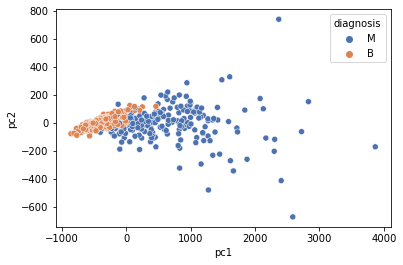

In [15]:
import seaborn as sns
sns.scatterplot(data=df2, x='pc1', y='pc2', hue='diagnosis', palette='deep')

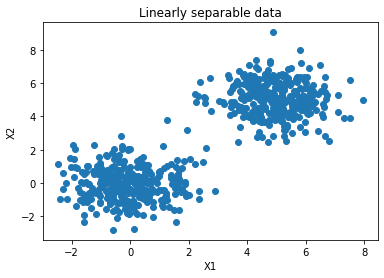

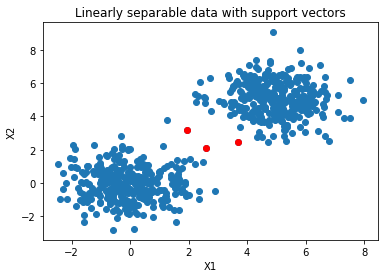

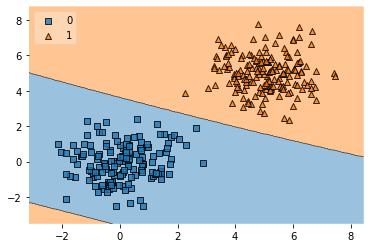

In [11]:
# Imports
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

# Configuration options
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 1000

# Generate data
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=frac_test_split, random_state=blobs_random_seed)

# Generate scatter plot for training data 
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Initialize SVM classifier
clf = svm.SVC(kernel = 'poly', C=10000, degree=2, gamma=.01)

# Fit data
clf = clf.fit(X_train, y_train)

# Predict the test set
predictions = clf.predict(X_test)

# Get support vectors
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Plot decision boundary
plot_decision_regions(X_test, y_test, clf=clf, legend=2)
plt.show()